In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Week 11-1
#### 의사결정나무 시각화

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.tree
import graphviz
#---#
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/guebin/MP2023/main/posts/insurance.csv')
df_train

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
# step1 
X = pd.get_dummies(df_train.loc[:,'age':'region'])
y = df_train['charges']
# step2 
predictr = sklearn.tree.DecisionTreeRegressor(max_depth=3)
# step3 
predictr.fit(X,y)
# step4 -- pass 

DecisionTreeRegressor(max_depth=3)

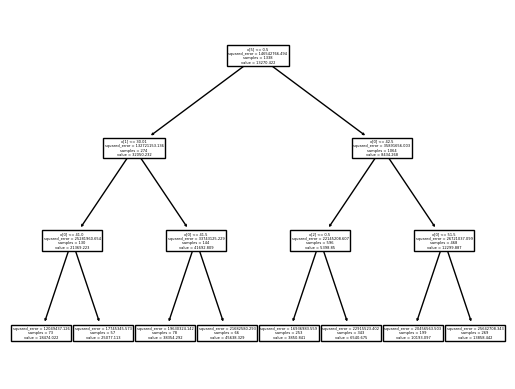

In [5]:
sklearn.tree.plot_tree(predictr);

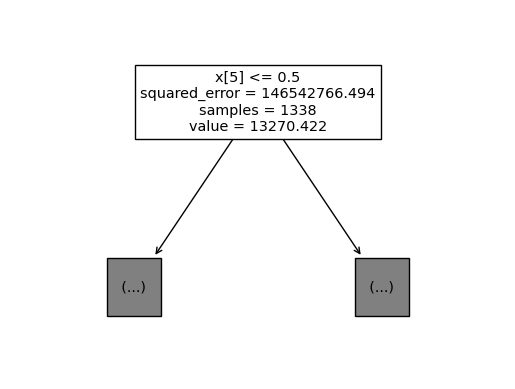

In [6]:
sklearn.tree.plot_tree(
    predictr,
    max_depth=0
);

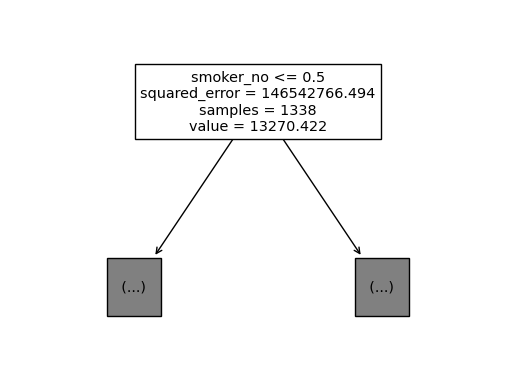

In [7]:
sklearn.tree.plot_tree(
    predictr,
    max_depth=0,
    feature_names=X.columns
);

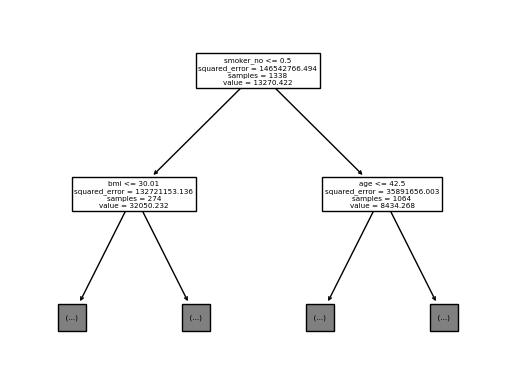

In [8]:
sklearn.tree.plot_tree(
    predictr,
    max_depth=1,
    feature_names=X.columns
);
fig = plt.gcf()

In [9]:
fig.suptitle("title??")

Text(0.5, 0.98, 'title??')

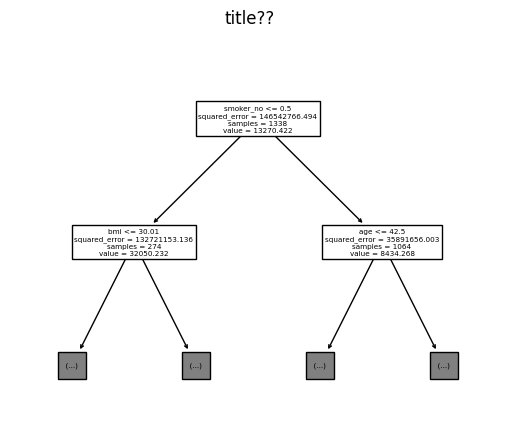

In [10]:
fig

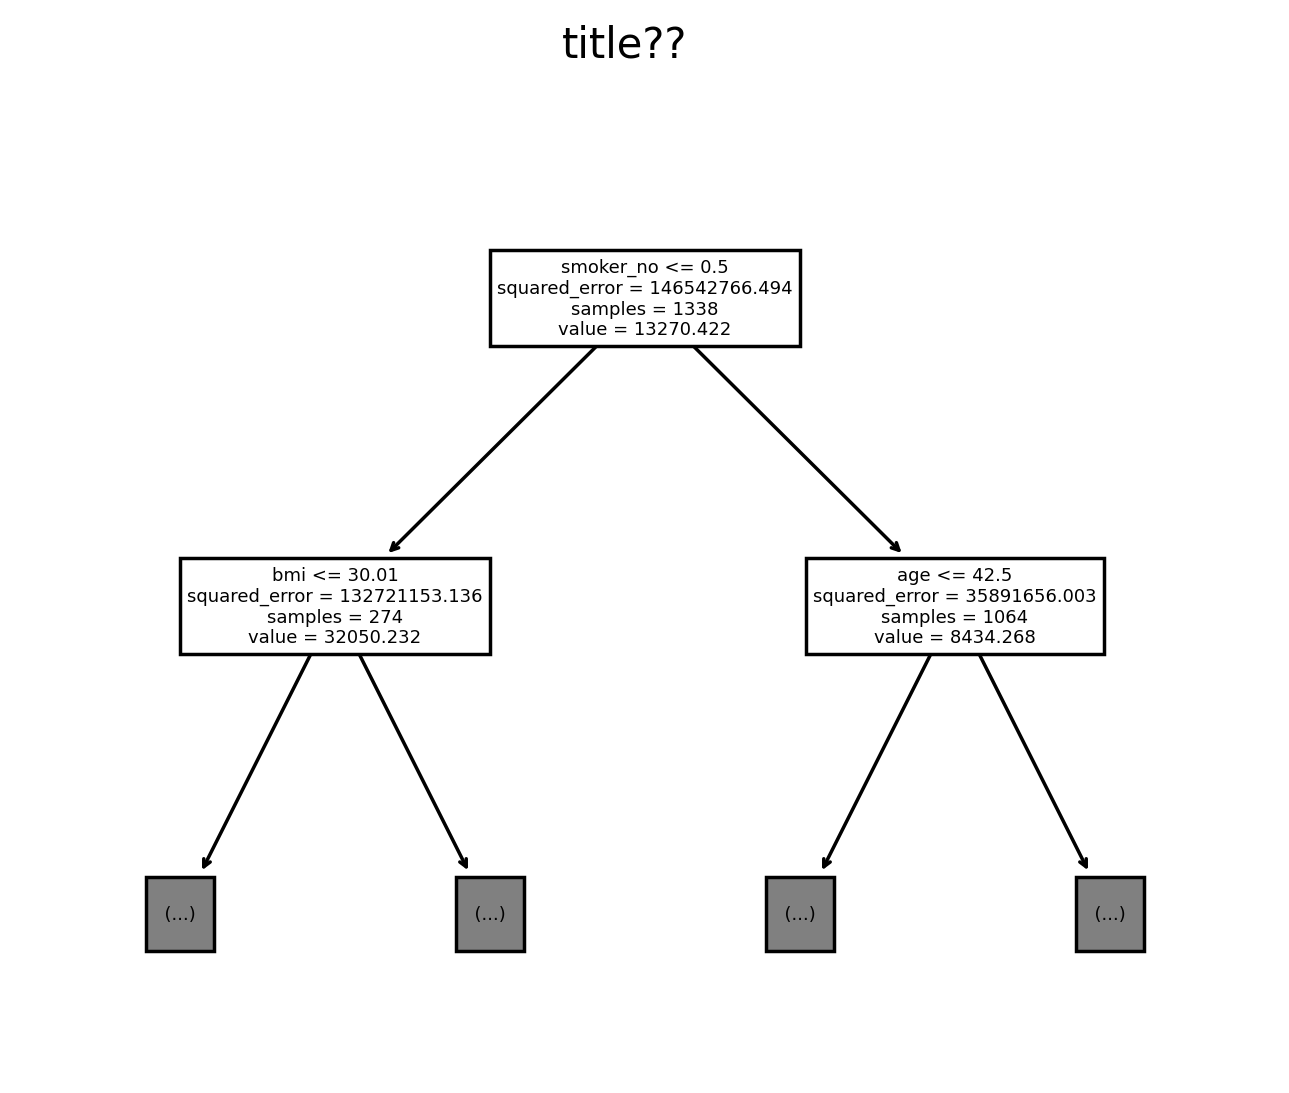

In [11]:
fig.set_dpi(250)
fig

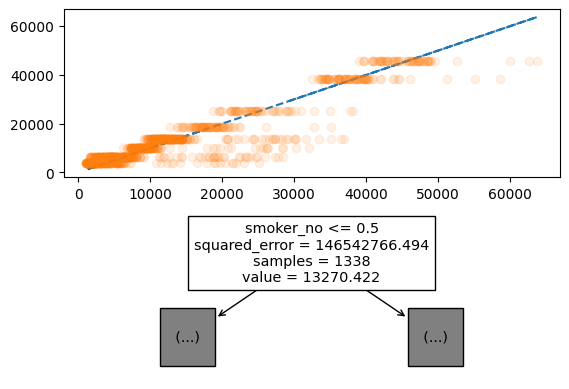

In [12]:
fig = plt.figure()
ax = fig.subplots(2,1)
ax[0].plot(y,y,'--')
ax[0].plot(y,predictr.predict(X),'o',alpha=0.1)
sklearn.tree.plot_tree(predictr,feature_names=X.columns,ax=ax[1],max_depth=0);

In [13]:
g = sklearn.tree.export_graphviz(
    predictr,
    feature_names=X.columns
)

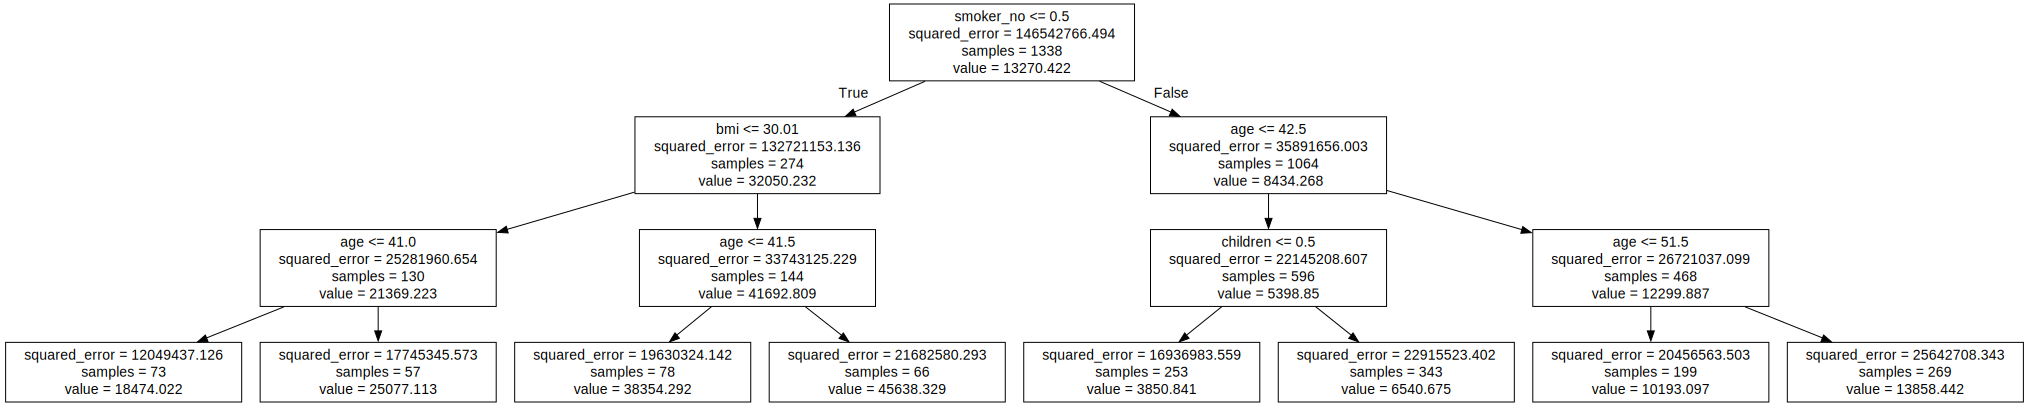

In [14]:
graphviz.Source(g)

In [15]:
g = sklearn.tree.export_graphviz(
    predictr,
    feature_names=X.columns
)
graphviz.Source(g).render('tree',format="pdf")

'tree.pdf'

## Week 11-2
#### 보험료 예측(의사결정나무)

#### 1. max_feature

In [19]:
df_train = pd.read_csv('https://raw.githubusercontent.com/guebin/MP2023/main/posts/insurance.csv')
df_train

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


- max_features에 제한을 주지 않음 ==> 항상 같은 결과가 나옴

In [22]:
# step1
X = pd.get_dummies(df_train.loc[:,'age':'region'],drop_first=True)
y = df_train['charges']
#step2
predictr = sklearn.tree.DecisionTreeRegressor()
#step3
predictr.fit(X,y)
#step4 -- pass

DecisionTreeRegressor()

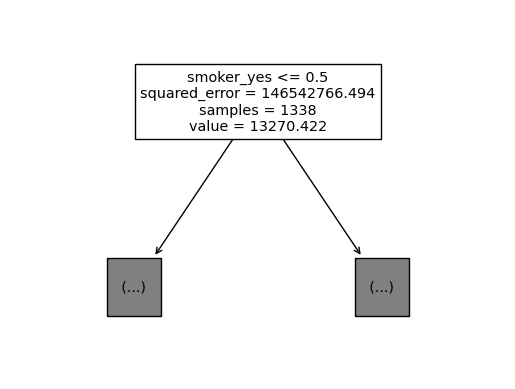

In [25]:
sklearn.tree.plot_tree(predictr,max_depth=0, feature_names=X.columns);

- max_features=4 로 제한
- 8개의 설명변수 중에서 4개만 임의로 뽑아서 그중에서 최적의 변수+최적의 $c$를 찾겠다.

In [26]:
len(X.columns)

8

In [57]:
# step1
X = pd.get_dummies(df_train.loc[:,'age':'region'],drop_first=True)
y = df_train['charges']
#step2
predictr = sklearn.tree.DecisionTreeRegressor(max_features=4)
#step3
predictr.fit(X,y)
#step4 -- pass

DecisionTreeRegressor(max_features=4)

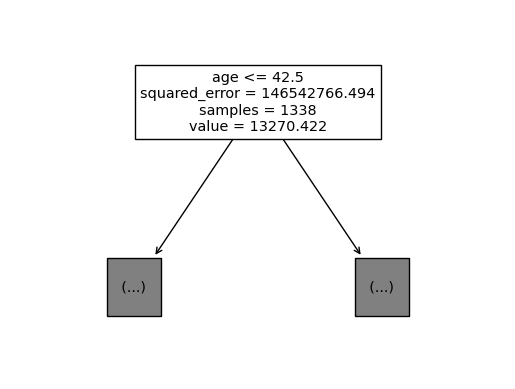

In [58]:
sklearn.tree.plot_tree(predictr,max_depth=0, feature_names=X.columns);

- 절반정도는 흡연여부가 가장 중요

## Week 11-3 
#### Weighted_Data

- 예제 1

In [59]:
X = np.array([1,2,3,4,5,6,7]).reshape(-1,1)
y = np.array([10,11,12,20,21,22,23])

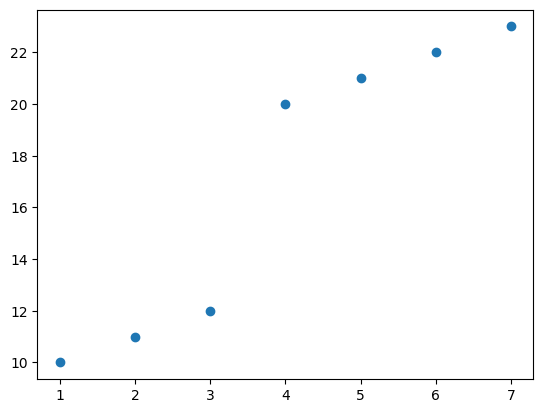

In [60]:
plt.plot(X,y,'o')

- 어디서 분기점을 나누는게 좋을까? 
- 3.5가 적당해보임

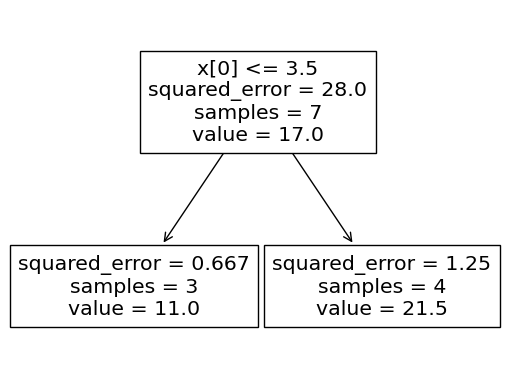

In [61]:
predictr = sklearn.tree.DecisionTreeRegressor(max_depth=1)
predictr.fit(X,y)
sklearn.tree.plot_tree(predictr);

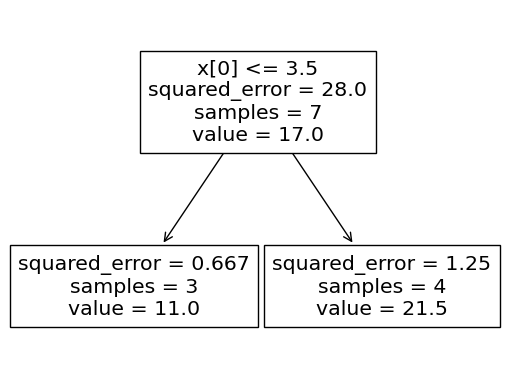

In [63]:
predictr = sklearn.tree.DecisionTreeRegressor(max_depth=1)
predictr.fit(X,y)
sklearn.tree.plot_tree(predictr);

- 예제 2

In [64]:
X = np.array([1]*5000+[2]*5000+[3,4,5,6,7]).reshape(-1,1)
y = np.array([10]*5000+[11]*5000+[12,20,21,22,23])

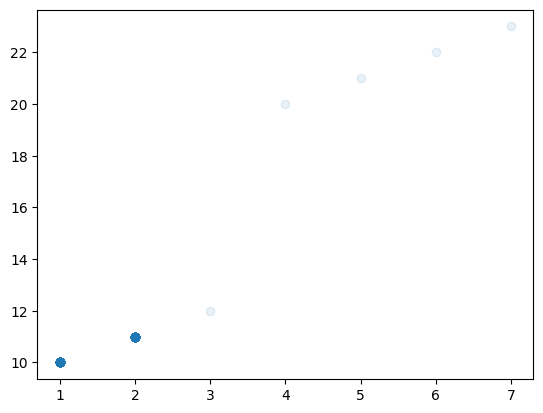

In [65]:
plt.plot(X,y,'o',alpha=0.1)

- 분기점을 어디서 나누는게 좋을까? 
- 언뜻보면 3.5 같지만 1,2 에서 5000개씩 데이터가 존재하므로(나머지 데이터는 무시할만큼 적으므로) 오히려 1.5가 적당함 

[Text(0.5, 0.75, 'x[0] <= 1.5\nsquared_error = 0.299\nsamples = 10005\nvalue = 10.505'),
 Text(0.25, 0.25, 'squared_error = 0.0\nsamples = 5000\nvalue = 10.0'),
 Text(0.75, 0.25, 'squared_error = 0.089\nsamples = 5005\nvalue = 11.009')]

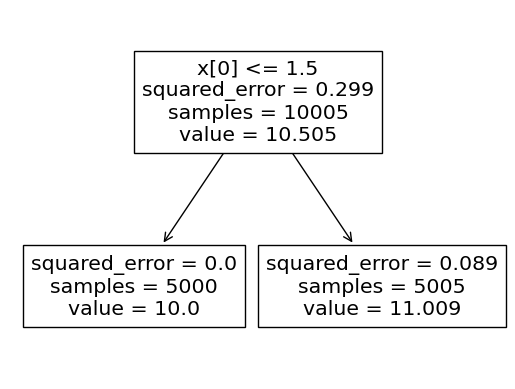

In [67]:
predictr = sklearn.tree.DecisionTreeRegressor(max_depth=1)
predictr.fit(X,y)
sklearn.tree.plot_tree(predictr)

- 예제 3

In [68]:
X = np.array([1,2,3,4,5,6,7]).reshape(-1,1)
y = np.array([10,11,12,20,21,22,23])

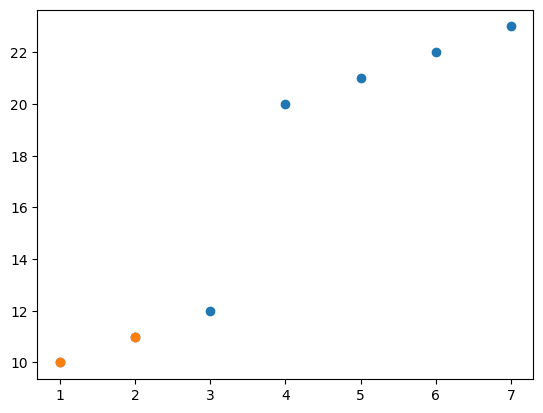

In [69]:
plt.plot(X,y,'o')
plt.plot(X[:2],y[:2],'o')

- 주황색점들을 잘 맞추는 것이 파란색을 잘 맞추는 것보다 5000배 정도 중요하다고 가정하자.
- 이런 경우에도 분기점을 1.5 정도가 적당할 것으로 예상됨.

[Text(0.5, 0.75, 'x[0] <= 1.5\nsquared_error = 0.299\nsamples = 7\nvalue = 10.505'),
 Text(0.25, 0.25, 'squared_error = 0.0\nsamples = 1\nvalue = 10.0'),
 Text(0.75, 0.25, 'squared_error = 0.089\nsamples = 6\nvalue = 11.009')]

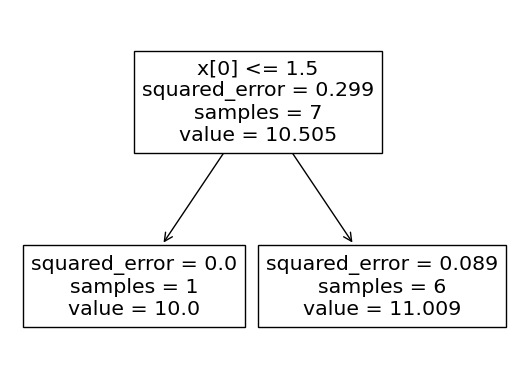

In [73]:
predictr = sklearn.tree.DecisionTreeRegressor(max_depth=1)
predictr.fit(X,y, sample_weight=[5000,5000,1,1,1,1,1])
sklearn.tree.plot_tree(predictr)

## Week 11-3
#### 아이스크림 판매량 예측 (의사결정-배깅)

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.tree
import sklearn.ensemble
#---#
import warnings
warnings.filterwarnings('ignore')
#---#
import matplotlib.animation
import IPython

In [79]:
np.random.seed(43052)
temp = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/temp.csv').iloc[:,3].to_numpy()[:80]
temp.sort()
eps = np.random.randn(80)*3 # 오차
icecream_sales = 20 + temp * 2.5 + eps 
df_train = pd.DataFrame({'temp':temp,'sales':icecream_sales})
df_train

,temp,sales
0,-4.1,10.900261
1,-3.7,14.002524
2,-3.0,15.928335
3,-1.3,17.673681
4,-0.5,19.463362
...,...,...
75,9.7,50.813741
76,10.3,42.304739
77,10.6,45.662019
78,12.1,48.739157


In [80]:
#step1
X = df_train[['temp']]
y = df_train[['sales']]
#step2
predictr = sklearn.tree.DecisionTreeRegressor()
#step3
predictr.fit(X,y)
#step4 -- pass

DecisionTreeRegressor()

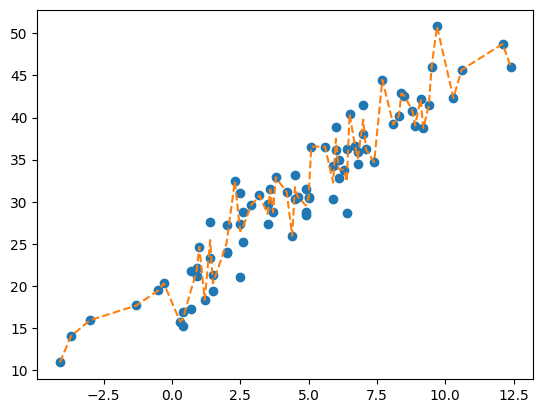

In [81]:
plt.plot(X,y,'o')
plt.plot(X,predictr.predict(X), '--')

- 의사결정나무의 오버피팅 문제를 해결하는 방법
- 여러개의 트리를 이용 ==> 앙상블

#### Bagging으로 적합

In [82]:
#step1
X = df_train[['temp']]
y = df_train[['sales']]
#step2
predictr = sklearn.ensemble.BaggingRegressor()
#step3
predictr.fit(X,y)
#step4 -- pass

BaggingRegressor()

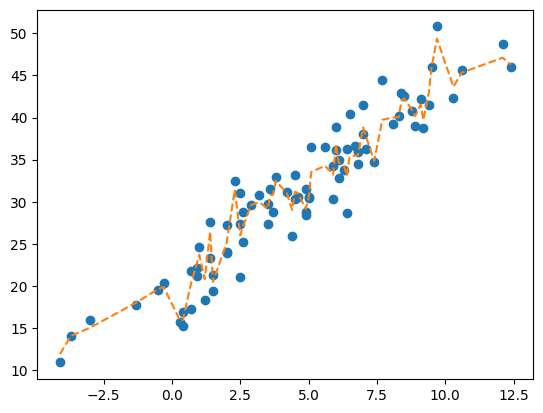

In [83]:
plt.plot(X,y,'o')
plt.plot(X,predictr.predict(X),'--')

#### 원리
- 알고리즘
    1. 80개의 샘플에서 80개를 중복을 허용하여 뽑는다.
    2. 1에서 뽑힌 샘플들을 이용하여 tree를 적합시킨다. 
    3. 1~2 과정을 10번 반복하고 10개의 tree의 평균값을 'yhat'으로 선택한다. 

#### plot_tree 체크
- 10개의 트리들의 리스트

In [117]:
trees = predictr.estimators_
trees

[DecisionTreeRegressor(random_state=1644635363),
 DecisionTreeRegressor(random_state=1304269235),
 DecisionTreeRegressor(random_state=1794000214),
 DecisionTreeRegressor(random_state=1273087880),
 DecisionTreeRegressor(random_state=995922005),
 DecisionTreeRegressor(random_state=1372517728),
 DecisionTreeRegressor(random_state=1087222928),
 DecisionTreeRegressor(random_state=3687756),
 DecisionTreeRegressor(random_state=1772778467),
 DecisionTreeRegressor(random_state=92158766)]

- 제표본데이터셋

In [118]:
samples = predictr.estimators_samples_ # (X,y)의 쌍을 80개 중복을 허용하여 뽑기위한 인덱스

- 첫번째 tree 재현

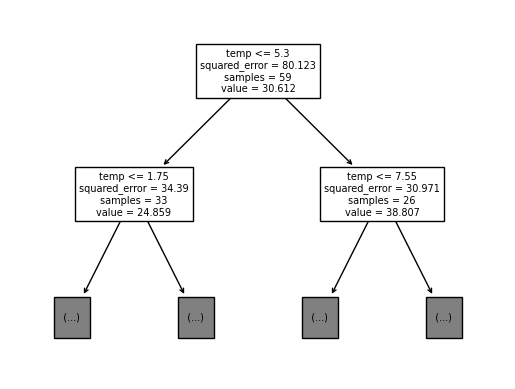

In [119]:
sklearn.tree.plot_tree(
    predictr.estimators_[0],
    feature_names=X.columns,
    max_depth=1);

In [120]:
X_array = np.array(X)
y_array = np.array(y)

In [121]:
tree = sklearn.tree.DecisionTreeRegressor()
tree.fit(X_array[samples[0]], y_array[samples[0]])

DecisionTreeRegressor()

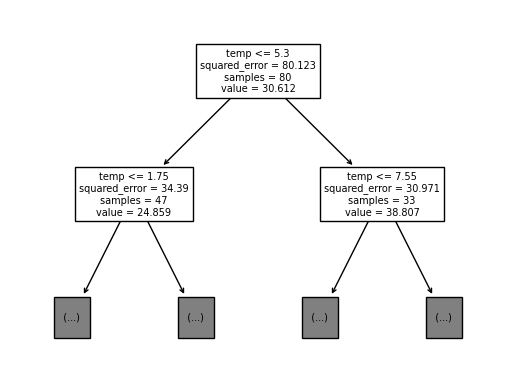

In [122]:
sklearn.tree.plot_tree(
    tree,
    feature_names=X.columns,
    max_depth=1);

- tree 비교(고정된 i)

Text(0.5, 1.0, 'my_tree')

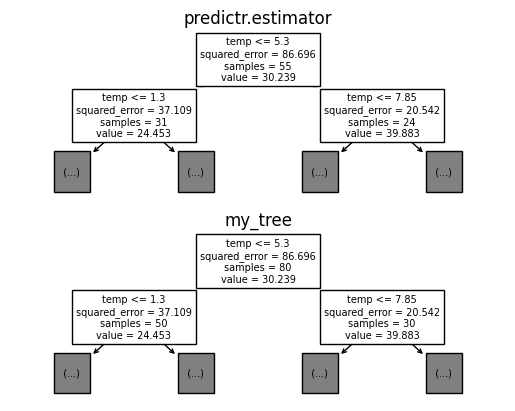

In [127]:
i=4
fig, ax = plt.subplots(2,1)
#---#
sklearn.tree.plot_tree(
    predictr.estimators_[i],
    feature_names=X.columns,
    max_depth=1,
    ax=ax[0]
)
ax[0].set_title('predictr.estimator')
#---#
my_tree = sklearn.tree.DecisionTreeRegressor()
my_tree.fit(X_array[samples[i]],y_array[samples[i]])
sklearn.tree.plot_tree(
    my_tree,
    feature_names=X.columns,
    max_depth=1,
    ax=ax[1]
);
ax[1].set_title('my_tree')

- tree 비교(애니메이션)

In [128]:
fig, ax = plt.subplots(2,1)
plt.close()
#---#
def func(i):
    ax[0].clear()
    sklearn.tree.plot_tree(
        predictr.estimators_[i],
        feature_names=X.columns,
        max_depth=1,
        ax=ax[0]
    )
    ax[0].set_title('predictr.estimator')
    #---#
    ax[1].clear()
    my_tree = sklearn.tree.DecisionTreeRegressor()
    my_tree.fit(X_array[samples[i]],y_array[samples[i]])
    sklearn.tree.plot_tree(
        my_tree,
        feature_names=X.columns,
        max_depth=1,
        ax=ax[1]
    );
    ax[1].set_title('my_tree')
#---#
ani = matplotlib.animation.FuncAnimation(fig,func,frames=10)
display(IPython.display.HTML(ani.to_jshtml()))

- 고정된 i

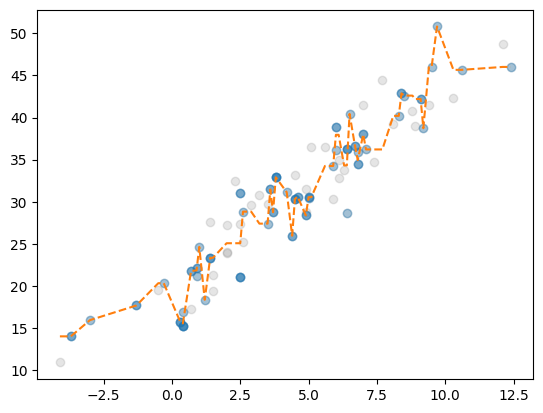

In [137]:
i = 3
plt.plot(X,y,'o', alpha=0.2, color='gray')
plt.plot(X_array[samples[i]],y_array[samples[i]],'o', alpha=1/3)
plt.plot(X,trees[i].predict(X), '--')

- gray 색은 전체데이터, 파란색은 resampling된 데이터

In [138]:
#---#
fig = plt.figure()
ax = fig.gca() 
plt.close()
#---#
def func(i):
    ax.clear()
    ax.plot(X,y,'o',alpha=0.2,color='gray')
    ax.plot(X_array[samples[i]],y_array[samples[i]],'o',alpha=1/3)
    ax.plot(X,trees[i].predict(X),'--')
#---#
ani = matplotlib.animation.FuncAnimation(fig,func,frames=10)
display(IPython.display.HTML(ani.to_jshtml()))

### 앙상블 결과 재현

In [139]:
predictr.predict(X)

array([11.88782962, 14.05941305, 15.02231867, 18.03161729, 19.62619066,
       19.86214551, 15.84293717, 15.95940294, 15.95940294, 20.30137042,
       20.30137042, 22.51278676, 22.51278676, 23.68899036, 20.7954938 ,
       26.45727462, 26.45727462, 20.48421278, 20.48421278, 25.08188452,
       25.08188452, 25.08188452, 31.42611771, 25.99393577, 25.99393577,
       25.99393577, 27.05912187, 27.05912187, 29.60439358, 29.94005816,
       29.18760881, 29.18760881, 30.75340115, 30.82608162, 32.48384789,
       31.03678302, 29.02978839, 31.17487146, 31.17487146, 31.05349512,
       29.147739  , 29.147739  , 29.147739  , 30.40843883, 30.40843883,
       33.53154643, 34.26668831, 33.20982041, 33.20982041, 36.82818648,
       36.82818648, 34.66545508, 34.66545508, 34.24047203, 33.0829342 ,
       33.0829342 , 35.29894866, 35.50366771, 35.47938512, 35.47938512,
       38.8116606 , 38.8116606 , 37.74794717, 34.84063828, 39.73515434,
       40.01130524, 40.05274675, 41.9980937 , 42.26869452, 40.81

In [140]:
np.stack([tree.predict(X) for tree in predictr.estimators_]).mean(axis=0)


array([11.88782962, 14.05941305, 15.02231867, 18.03161729, 19.62619066,
       19.86214551, 15.84293717, 15.95940294, 15.95940294, 20.30137042,
       20.30137042, 22.51278676, 22.51278676, 23.68899036, 20.7954938 ,
       26.45727462, 26.45727462, 20.48421278, 20.48421278, 25.08188452,
       25.08188452, 25.08188452, 31.42611771, 25.99393577, 25.99393577,
       25.99393577, 27.05912187, 27.05912187, 29.60439358, 29.94005816,
       29.18760881, 29.18760881, 30.75340115, 30.82608162, 32.48384789,
       31.03678302, 29.02978839, 31.17487146, 31.17487146, 31.05349512,
       29.147739  , 29.147739  , 29.147739  , 30.40843883, 30.40843883,
       33.53154643, 34.26668831, 33.20982041, 33.20982041, 36.82818648,
       36.82818648, 34.66545508, 34.66545508, 34.24047203, 33.0829342 ,
       33.0829342 , 35.29894866, 35.50366771, 35.47938512, 35.47938512,
       38.8116606 , 38.8116606 , 37.74794717, 34.84063828, 39.73515434,
       40.01130524, 40.05274675, 41.9980937 , 42.26869452, 40.81

In [141]:
def ensemble(trees,i=None):
    if i is None:
        i = len(trees)
    else: 
        i = i+1
    yhat = np.stack([tree.predict(X) for tree in trees[:i]]).mean(axis=0)
    return yhat

In [142]:
ensemble(trees,0) # 0번트리만 적용


array([10.90026146, 10.90026146, 10.90026146, 19.46336233, 19.46336233,
       20.31785349, 16.3076088 , 16.3076088 , 16.3076088 , 20.27763408,
       20.27763408, 21.52796629, 21.52796629, 21.52796629, 18.34698175,
       27.5369675 , 27.5369675 , 20.30881248, 20.30881248, 25.04963215,
       25.04963215, 25.04963215, 32.42440294, 26.49340711, 26.49340711,
       26.49340711, 26.40925726, 26.40925726, 29.55903213, 30.75418385,
       29.70592592, 29.70592592, 31.45007539, 32.89828946, 32.89828946,
       31.12503261, 25.9552363 , 33.12203011, 33.12203011, 30.60313283,
       29.45886461, 29.45886461, 29.45886461, 30.60789344, 30.60789344,
       30.60789344, 36.5245913 , 34.24458444, 34.24458444, 37.4829917 ,
       37.4829917 , 37.4829917 , 37.4829917 , 31.13974993, 31.13974993,
       31.13974993, 31.13974993, 36.58400962, 35.1723381 , 35.1723381 ,
       39.75311187, 39.75311187, 39.75311187, 34.68877582, 44.47780794,
       39.1744058 , 40.19626989, 42.86734269, 42.60143843, 40.80

In [143]:
ensemble(trees,1) # 0번트리,1번트리의 예측값 평균


array([10.90026146, 12.45139248, 12.45139248, 18.56852168, 19.46336233,
       20.31785349, 16.03419127, 16.57964463, 16.57964463, 21.02420483,
       21.02420483, 21.3736233 , 21.3736233 , 23.07741787, 22.94197463,
       27.5369675 , 27.5369675 , 19.83347885, 19.83347885, 26.16305209,
       26.16305209, 26.16305209, 32.42440294, 28.7554569 , 28.7554569 ,
       28.7554569 , 27.61337612, 27.61337612, 29.55903213, 30.75418385,
       28.54972991, 28.54972991, 31.45007539, 30.82608162, 30.82608162,
       31.66094517, 29.07604701, 32.65944392, 32.65944392, 30.60313283,
       29.40787056, 29.40787056, 29.40787056, 30.5566788 , 30.5566788 ,
       33.57934676, 36.5245913 , 35.63234869, 35.63234869, 37.25155232,
       37.25155232, 35.85263528, 35.85263528, 32.46466946, 33.6755663 ,
       33.6755663 , 35.78403852, 35.87817386, 35.1723381 , 35.1723381 ,
       40.62427057, 40.62427057, 40.62427057, 34.68877582, 44.47780794,
       41.82610687, 40.50051831, 41.83605471, 41.70310258, 40.80

### 학습과정 시각화

- 고정된 i

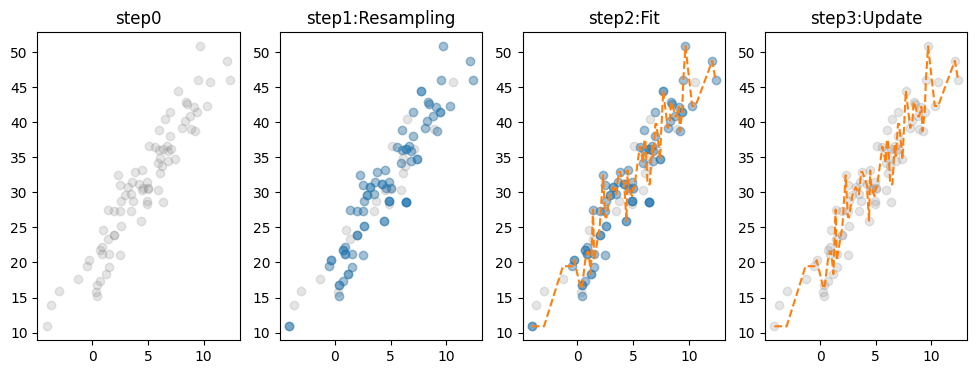

In [151]:
i = 0
fig,ax = plt.subplots(1,4, figsize=(12,4))
#--#
ax[0].set_title("step0")
ax[0].plot(X,y,'o',color='gray',alpha=0.2)
#--#
ax[1].set_title("step1:Resampling")
ax[1].plot(X,y,'o',color='gray',alpha=0.2)
ax[1].plot(X_array[samples[i]], y_array[samples[i]],'o',alpha=1/3)
#--#
ax[2].set_title("step2:Fit")
ax[2].plot(X,y,'o',color='gray',alpha=0.2)
ax[2].plot(X_array[samples[i]], y_array[samples[i]],'o',alpha=1/3)
ax[2].plot(X,trees[i].predict(X),'--')
#--#
ax[3].set_title("step3:Update")
ax[3].plot(X,y,'o',color='gray',alpha=0.2)
ax[3].plot(X,ensemble(trees,i),'--', color='C1')

- 애니메이션 효과

In [156]:
fig,ax = plt.subplots(1,4,figsize=(12,4))
plt.close()
#--#
def func(i):
    for a in ax:
        a.clear()
    #--#
    ax[0].set_title("step0")
    ax[0].plot(X,y,'o',color='gray',alpha=0.2)
    #--#
    ax[1].set_title("step1:Resampling")
    ax[1].plot(X,y,'o',color='gray',alpha=0.2)
    ax[1].plot(X_array[samples[i]], y_array[samples[i]],'o',alpha=1/3)
    #--#
    ax[2].set_title("step2:Fit")
    ax[2].plot(X,y,'o',color='gray',alpha=0.2)
    ax[2].plot(X_array[samples[i]], y_array[samples[i]],'o',alpha=1/3)
    ax[2].plot(X,trees[i].predict(X),'--')
    #--#
    ax[3].set_title("step3:Update")
    ax[3].plot(X,y,'o',color='gray',alpha=0.2)
    ax[3].plot(X,ensemble(trees,i),'--', color='C1')
#--#
ani = matplotlib.animation.FuncAnimation(fig,func,frames=10)
display(IPython.display.HTML(ani.to_jshtml()))

# discussion
- 이런 resampling 방법을 생각한 근거? ==> 부스트랩